In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.layers import Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
file_dir = "C:/data/"
image_size = (224, 224)
cartegories  = os.listdir(file_dir)
num_classes = len(cartegories)
X=[]
Y=[]

print(cartegories)
# 이미지 전처리
for i, categorie in  enumerate(cartegories):
    label = [0 for i in range(num_classes)]
    label[i] = 1
    print(categorie)
    img_dir =  file_dir+categorie +"/"
    img_list = os.listdir(img_dir)
    for img_list_dir in img_list:
        img_path = img_dir+img_list_dir
        img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
        img = cv2.resize(img, image_size)
        X.append(img / 255)
        Y.append(label)
        print(img_path)
X=np.array(X)
Y=np.array(Y)

print(X.shape)
print(X.shape[1:])

['검은별무늬병', '그을음병', '노균병', '덩굴마름병', '모자이크병', '세균성모무늬병', '정상', '탄저병', '흰가루병']
검은별무늬병
C:/data/검은별무늬병/f1_80(1).jpg
C:/data/검은별무늬병/f1_80(2).jpg
C:/data/검은별무늬병/f1_80(3).jpg
C:/data/검은별무늬병/f1_80(4).jpg
C:/data/검은별무늬병/f1_80(5).jpg
C:/data/검은별무늬병/f1_80(6).jpg
C:/data/검은별무늬병/f1_80(7).jpg
C:/data/검은별무늬병/f1_80(8).jpg
C:/data/검은별무늬병/f1_80(9).jpg
C:/data/검은별무늬병/inverted_13.png
C:/data/검은별무늬병/inverted_14.png
C:/data/검은별무늬병/inverted_15.png
C:/data/검은별무늬병/inverted_16.png
C:/data/검은별무늬병/inverted_17.png
C:/data/검은별무늬병/inverted_2.png
C:/data/검은별무늬병/inverted_23.png
C:/data/검은별무늬병/inverted_24.png
C:/data/검은별무늬병/inverted_29.png
C:/data/검은별무늬병/inverted_3.png
C:/data/검은별무늬병/inverted_34.png
C:/data/검은별무늬병/inverted_38.png
C:/data/검은별무늬병/inverted_4.png
C:/data/검은별무늬병/inverted_40.png
C:/data/검은별무늬병/inverted_42.png
C:/data/검은별무늬병/inverted_46.png
C:/data/검은별무늬병/inverted_48.png
C:/data/검은별무늬병/inverted_49.png
C:/data/검은별무늬병/inverted_50.png
C:/data/검은별무늬병/inverted_51.png
C:/data/검은별무늬병/inverted_52.png
C:/data/검은별무늬병/in

C:/data/노균병/d1_18(6).jpg
C:/data/노균병/d1_18(7).jpg
C:/data/노균병/d1_18(8).jpg
C:/data/노균병/d1_18(9).jpg
C:/data/노균병/d1_55(1).jpg
C:/data/노균병/d1_55(2).jpg
C:/data/노균병/d1_55(3).jpg
C:/data/노균병/d1_55(4).jpg
C:/data/노균병/d1_55(5).jpg
C:/data/노균병/d1_55(6).jpg
C:/data/노균병/d1_55(7).jpg
C:/data/노균병/d1_55(8).jpg
C:/data/노균병/d1_55(9).jpg
C:/data/노균병/d1_70(1).jpg
C:/data/노균병/d1_70(2).jpg
C:/data/노균병/d1_70(3).jpg
C:/data/노균병/d1_70(4).jpg
C:/data/노균병/d1_70(5).jpg
C:/data/노균병/d1_70(6).jpg
C:/data/노균병/d1_70(7).jpg
C:/data/노균병/d1_70(8).jpg
C:/data/노균병/d1_70(9).jpg
C:/data/노균병/d1_77(1).jpg
C:/data/노균병/d1_77(2).jpg
C:/data/노균병/d1_77(3).jpg
C:/data/노균병/d1_77(4).jpg
C:/data/노균병/d1_77(5).jpg
C:/data/노균병/d1_77(6).jpg
C:/data/노균병/d1_77(7).jpg
C:/data/노균병/d1_77(8).jpg
C:/data/노균병/d1_77(9).jpg
C:/data/노균병/d1_83(1).jpg
C:/data/노균병/d1_83(2).jpg
C:/data/노균병/d1_83(3).jpg
C:/data/노균병/d1_83(4).jpg
C:/data/노균병/d1_83(5).jpg
C:/data/노균병/d1_83(6).jpg
C:/data/노균병/d1_83(7).jpg
C:/data/노균병/d1_83(8).jpg
C:/data/노균병/d1_83(9).jpg


C:/data/노균병/h1_25(5).jpg
C:/data/노균병/h1_25(6).jpg
C:/data/노균병/h1_25(7).jpg
C:/data/노균병/h1_25(8).jpg
C:/data/노균병/h1_25(9).jpg
C:/data/노균병/h1_26(1).jpg
C:/data/노균병/h1_26(2).jpg
C:/data/노균병/h1_26(4).jpg
C:/data/노균병/h1_26(5).jpg
C:/data/노균병/h1_26(8).jpg
C:/data/노균병/h1_26(9).jpg
C:/data/노균병/h1_29(1).jpg
C:/data/노균병/h1_29(2).jpg
C:/data/노균병/h1_29(3).jpg
C:/data/노균병/h1_29(4).jpg
C:/data/노균병/h1_29(5).jpg
C:/data/노균병/h1_29(6).jpg
C:/data/노균병/h1_29(7).jpg
C:/data/노균병/h1_29(8).jpg
C:/data/노균병/h1_29(9).jpg
C:/data/노균병/h1_38(1).jpg
C:/data/노균병/h1_38(2).jpg
C:/data/노균병/h1_38(3).jpg
C:/data/노균병/h1_38(4).jpg
C:/data/노균병/h1_38(5).jpg
C:/data/노균병/h1_38(6).jpg
C:/data/노균병/h1_38(7).jpg
C:/data/노균병/h1_38(8).jpg
C:/data/노균병/h1_38(9).jpg
C:/data/노균병/h1_39(1).jpg
C:/data/노균병/h1_39(2).jpg
C:/data/노균병/h1_39(3).jpg
C:/data/노균병/h1_39(4).jpg
C:/data/노균병/h1_39(5).jpg
C:/data/노균병/h1_39(6).jpg
C:/data/노균병/h1_39(7).jpg
C:/data/노균병/h1_39(8).jpg
C:/data/노균병/h1_39(9).jpg
C:/data/노균병/h1_50(1).jpg
C:/data/노균병/h1_50(2).jpg


C:/data/노균병/k1_18(7).jpg
C:/data/노균병/k1_18(8).jpg
C:/data/노균병/k1_18(9).jpg
C:/data/노균병/k1_19(1).jpg
C:/data/노균병/k1_19(2).jpg
C:/data/노균병/k1_19(3).jpg
C:/data/노균병/k1_19(4).jpg
C:/data/노균병/k1_19(5).jpg
C:/data/노균병/k1_19(6).jpg
C:/data/노균병/k1_19(7).jpg
C:/data/노균병/k1_19(8).jpg
C:/data/노균병/k1_19(9).jpg
C:/data/노균병/k1_56(1).jpg
C:/data/노균병/k1_56(2).jpg
C:/data/노균병/k1_56(3).jpg
C:/data/노균병/k1_56(4).jpg
C:/data/노균병/k1_56(5).jpg
C:/data/노균병/k1_56(6).jpg
C:/data/노균병/k1_56(7).jpg
C:/data/노균병/k1_56(8).jpg
C:/data/노균병/k1_56(9).jpg
C:/data/노균병/k1_60(1).jpg
C:/data/노균병/k1_60(2).jpg
C:/data/노균병/k1_60(3).jpg
C:/data/노균병/k1_60(4).jpg
C:/data/노균병/k1_60(5).jpg
C:/data/노균병/k1_60(6).jpg
C:/data/노균병/k1_60(7).jpg
C:/data/노균병/k1_60(8).jpg
C:/data/노균병/k1_60(9).jpg
C:/data/노균병/k1_61(1).jpg
C:/data/노균병/k1_61(2).jpg
C:/data/노균병/k1_61(3).jpg
C:/data/노균병/k1_61(4).jpg
C:/data/노균병/k1_61(5).jpg
C:/data/노균병/k1_61(6).jpg
C:/data/노균병/k1_61(7).jpg
C:/data/노균병/k1_61(8).jpg
C:/data/노균병/k1_61(9).jpg
C:/data/노균병/k1_67(1).jpg


C:/data/모자이크병/a1_77(4).jpg
C:/data/모자이크병/a1_77(5).jpg
C:/data/모자이크병/a1_77(6).jpg
C:/data/모자이크병/a1_77(7).jpg
C:/data/모자이크병/a1_77(8).jpg
C:/data/모자이크병/a1_77(9).jpg
C:/data/모자이크병/a1_85(1).jpg
C:/data/모자이크병/a1_85(2).jpg
C:/data/모자이크병/a1_85(3).jpg
C:/data/모자이크병/a1_85(4).jpg
C:/data/모자이크병/a1_85(5).jpg
C:/data/모자이크병/a1_85(6).jpg
C:/data/모자이크병/a1_85(7).jpg
C:/data/모자이크병/a1_85(8).jpg
C:/data/모자이크병/a1_85(9).jpg
C:/data/모자이크병/d1_101(1).jpg
C:/data/모자이크병/d1_101(2).jpg
C:/data/모자이크병/d1_101(3).jpg
C:/data/모자이크병/d1_101(4).jpg
C:/data/모자이크병/d1_101(5).jpg
C:/data/모자이크병/d1_101(6).jpg
C:/data/모자이크병/d1_101(7).jpg
C:/data/모자이크병/d1_101(8).jpg
C:/data/모자이크병/d1_101(9).jpg
C:/data/모자이크병/d1_106(1).jpg
C:/data/모자이크병/d1_106(2).jpg
C:/data/모자이크병/d1_106(3).jpg
C:/data/모자이크병/d1_106(4).jpg
C:/data/모자이크병/d1_106(5).jpg
C:/data/모자이크병/d1_106(6).jpg
C:/data/모자이크병/d1_106(7).jpg
C:/data/모자이크병/d1_106(8).jpg
C:/data/모자이크병/d1_106(9).jpg
C:/data/모자이크병/d1_12(1).jpg
C:/data/모자이크병/d1_12(2).jpg
C:/data/모자이크병/d1_12(3).jpg
C:/data/모자

C:/data/모자이크병/h1_22(5).jpg
C:/data/모자이크병/h1_22(6).jpg
C:/data/모자이크병/h1_22(7).jpg
C:/data/모자이크병/h1_22(8).jpg
C:/data/모자이크병/h1_22(9).jpg
C:/data/모자이크병/h1_51(1).jpg
C:/data/모자이크병/h1_51(2).jpg
C:/data/모자이크병/h1_51(3).jpg
C:/data/모자이크병/h1_51(4).jpg
C:/data/모자이크병/h1_51(5).jpg
C:/data/모자이크병/h1_51(6).jpg
C:/data/모자이크병/h1_51(7).jpg
C:/data/모자이크병/h1_51(8).jpg
C:/data/모자이크병/h1_51(9).jpg
C:/data/모자이크병/h1_71(1).jpg
C:/data/모자이크병/h1_71(2).jpg
C:/data/모자이크병/h1_71(3).jpg
C:/data/모자이크병/h1_71(4).jpg
C:/data/모자이크병/h1_71(5).jpg
C:/data/모자이크병/h1_71(6).jpg
C:/data/모자이크병/h1_71(7).jpg
C:/data/모자이크병/h1_71(8).jpg
C:/data/모자이크병/h1_71(9).jpg
C:/data/모자이크병/h1_90(1).jpg
C:/data/모자이크병/h1_90(2).jpg
C:/data/모자이크병/h1_90(3).jpg
C:/data/모자이크병/h1_90(4).jpg
C:/data/모자이크병/h1_90(5).jpg
C:/data/모자이크병/h1_90(6).jpg
C:/data/모자이크병/h1_90(7).jpg
C:/data/모자이크병/h1_90(8).jpg
C:/data/모자이크병/h1_90(9).jpg
C:/data/모자이크병/h1_91(1).jpg
C:/data/모자이크병/h1_91(2).jpg
C:/data/모자이크병/h1_91(3).jpg
C:/data/모자이크병/h1_91(4).jpg
C:/data/모자이크병/h1_91(5).jpg
C

C:/data/세균성모무늬병/g1_63(6).jpg
C:/data/세균성모무늬병/g1_63(7).jpg
C:/data/세균성모무늬병/g1_63(8).jpg
C:/data/세균성모무늬병/g1_63(9).jpg
C:/data/세균성모무늬병/g1_65(1).jpg
C:/data/세균성모무늬병/g1_65(2).jpg
C:/data/세균성모무늬병/g1_65(3).jpg
C:/data/세균성모무늬병/g1_65(4).jpg
C:/data/세균성모무늬병/g1_65(5).jpg
C:/data/세균성모무늬병/g1_65(6).jpg
C:/data/세균성모무늬병/g1_65(7).jpg
C:/data/세균성모무늬병/g1_65(8).jpg
C:/data/세균성모무늬병/g1_65(9).jpg
C:/data/세균성모무늬병/g1_68(1).jpg
C:/data/세균성모무늬병/g1_68(2).jpg
C:/data/세균성모무늬병/g1_68(3).jpg
C:/data/세균성모무늬병/g1_68(4).jpg
C:/data/세균성모무늬병/g1_68(5).jpg
C:/data/세균성모무늬병/g1_68(6).jpg
C:/data/세균성모무늬병/g1_68(7).jpg
C:/data/세균성모무늬병/g1_68(8).jpg
C:/data/세균성모무늬병/g1_68(9).jpg
C:/data/세균성모무늬병/g1_72(1).jpg
C:/data/세균성모무늬병/g1_72(2).jpg
C:/data/세균성모무늬병/g1_72(3).jpg
C:/data/세균성모무늬병/g1_72(4).jpg
C:/data/세균성모무늬병/g1_72(5).jpg
C:/data/세균성모무늬병/g1_72(6).jpg
C:/data/세균성모무늬병/g1_72(7).jpg
C:/data/세균성모무늬병/g1_72(8).jpg
C:/data/세균성모무늬병/g1_72(9).jpg
C:/data/세균성모무늬병/g1_73(1).jpg
C:/data/세균성모무늬병/g1_73(2).jpg
C:/data/세균성모무늬병/g1_73(3).jpg
C:/data/세균성모무늬

C:/data/정상/b1_27(2).jpg
C:/data/정상/b1_27(3).jpg
C:/data/정상/b1_27(4).jpg
C:/data/정상/b1_27(5).jpg
C:/data/정상/b1_27(6).jpg
C:/data/정상/b1_27(7).jpg
C:/data/정상/b1_27(8).jpg
C:/data/정상/b1_27(9).jpg
C:/data/정상/b1_28(1).jpg
C:/data/정상/b1_28(2).jpg
C:/data/정상/b1_28(3).jpg
C:/data/정상/b1_28(4).jpg
C:/data/정상/b1_28(5).jpg
C:/data/정상/b1_28(6).jpg
C:/data/정상/b1_28(7).jpg
C:/data/정상/b1_28(8).jpg
C:/data/정상/b1_28(9).jpg
C:/data/정상/b1_29(1).jpg
C:/data/정상/b1_29(2).jpg
C:/data/정상/b1_29(3).jpg
C:/data/정상/b1_29(4).jpg
C:/data/정상/b1_29(5).jpg
C:/data/정상/b1_29(6).jpg
C:/data/정상/b1_29(7).jpg
C:/data/정상/b1_29(8).jpg
C:/data/정상/b1_29(9).jpg
C:/data/정상/b1_3(1).jpg
C:/data/정상/b1_30(1).jpg
C:/data/정상/b1_31(1).jpg
C:/data/정상/b1_31(2).jpg
C:/data/정상/b1_31(3).jpg
C:/data/정상/b1_31(4).jpg
C:/data/정상/b1_31(5).jpg
C:/data/정상/b1_31(6).jpg
C:/data/정상/b1_31(7).jpg
C:/data/정상/b1_31(8).jpg
C:/data/정상/b1_31(9).jpg
C:/data/정상/b1_32(1).jpg
C:/data/정상/b1_32(2).jpg
C:/data/정상/b1_4(1).jpg
C:/data/정상/b1_5(1).jpg
C:/data/정상/b1_5(2).

C:/data/정상/g1_79(5).jpg
C:/data/정상/g1_79(6).jpg
C:/data/정상/g1_79(7).jpg
C:/data/정상/g1_79(8).jpg
C:/data/정상/g1_79(9).jpg
C:/data/정상/g1_80(1).jpg
C:/data/정상/g1_80(2).jpg
C:/data/정상/g1_80(3).jpg
C:/data/정상/g1_80(4).jpg
C:/data/정상/g1_80(5).jpg
C:/data/정상/g1_80(6).jpg
C:/data/정상/g1_80(7).jpg
C:/data/정상/g1_80(8).jpg
C:/data/정상/g1_80(9).jpg
C:/data/정상/g1_81(1).jpg
C:/data/정상/g1_81(2).jpg
C:/data/정상/g1_81(3).jpg
C:/data/정상/g1_81(4).jpg
C:/data/정상/g1_81(5).jpg
C:/data/정상/g1_81(6).jpg
C:/data/정상/g1_81(7).jpg
C:/data/정상/g1_81(8).jpg
C:/data/정상/g1_81(9).jpg
C:/data/정상/g1_83(1).jpg
C:/data/정상/g1_83(2).jpg
C:/data/정상/g1_83(3).jpg
C:/data/정상/g1_83(4).jpg
C:/data/정상/g1_83(5).jpg
C:/data/정상/g1_83(6).jpg
C:/data/정상/g1_83(7).jpg
C:/data/정상/g1_83(8).jpg
C:/data/정상/g1_83(9).jpg
C:/data/정상/g1_84(1).jpg
C:/data/정상/g1_84(2).jpg
C:/data/정상/g1_84(3).jpg
C:/data/정상/g1_84(4).jpg
C:/data/정상/g1_84(5).jpg
C:/data/정상/g1_84(6).jpg
C:/data/정상/g1_84(7).jpg
C:/data/정상/g1_84(8).jpg
C:/data/정상/g1_84(9).jpg
C:/data/정상/g1_85

C:/data/정상/j1_114(1).jpg
C:/data/정상/j1_114(2).jpg
C:/data/정상/j1_114(3).jpg
C:/data/정상/j1_114(4).jpg
C:/data/정상/j1_114(5).jpg
C:/data/정상/j1_114(6).jpg
C:/data/정상/j1_114(7).jpg
C:/data/정상/j1_114(8).jpg
C:/data/정상/j1_114(9).jpg
C:/data/정상/j1_115(1).jpg
C:/data/정상/j1_115(2).jpg
C:/data/정상/j1_115(3).jpg
C:/data/정상/j1_115(4).jpg
C:/data/정상/j1_115(5).jpg
C:/data/정상/j1_115(6).jpg
C:/data/정상/j1_115(7).jpg
C:/data/정상/j1_115(8).jpg
C:/data/정상/j1_115(9).jpg
C:/data/정상/j1_116(1).jpg
C:/data/정상/j1_116(2).jpg
C:/data/정상/j1_116(3).jpg
C:/data/정상/j1_116(4).jpg
C:/data/정상/j1_116(5).jpg
C:/data/정상/j1_116(6).jpg
C:/data/정상/j1_116(7).jpg
C:/data/정상/j1_116(8).jpg
C:/data/정상/j1_116(9).jpg
C:/data/정상/j1_117(1).jpg
C:/data/정상/j1_117(2).jpg
C:/data/정상/j1_117(3).jpg
C:/data/정상/j1_117(4).jpg
C:/data/정상/j1_117(5).jpg
C:/data/정상/j1_117(6).jpg
C:/data/정상/j1_117(7).jpg
C:/data/정상/j1_117(8).jpg
C:/data/정상/j1_117(9).jpg
C:/data/정상/j1_119(1).jpg
C:/data/정상/j1_119(2).jpg
C:/data/정상/j1_119(3).jpg
C:/data/정상/j1_119(4).jpg


C:/data/탄저병/d1_52(9).jpg
C:/data/탄저병/d1_7(1).jpg
C:/data/탄저병/d1_7(2).jpg
C:/data/탄저병/d1_7(3).jpg
C:/data/탄저병/d1_7(7).jpg
C:/data/탄저병/d1_7(8).jpg
C:/data/탄저병/e1_161(1).jpg
C:/data/탄저병/e1_161(2).jpg
C:/data/탄저병/e1_161(3).jpg
C:/data/탄저병/e1_161(4).jpg
C:/data/탄저병/e1_161(5).jpg
C:/data/탄저병/e1_161(6).jpg
C:/data/탄저병/e1_161(7).jpg
C:/data/탄저병/e1_161(8).jpg
C:/data/탄저병/e1_161(9).jpg
C:/data/탄저병/f1_101(1).jpg
C:/data/탄저병/f1_101(2).jpg
C:/data/탄저병/f1_101(3).jpg
C:/data/탄저병/f1_101(4).jpg
C:/data/탄저병/f1_101(5).jpg
C:/data/탄저병/f1_101(6).jpg
C:/data/탄저병/f1_101(7).jpg
C:/data/탄저병/f1_101(8).jpg
C:/data/탄저병/f1_101(9).jpg
C:/data/탄저병/f1_124(1).jpg
C:/data/탄저병/f1_124(2).jpg
C:/data/탄저병/f1_124(3).jpg
C:/data/탄저병/f1_124(4).jpg
C:/data/탄저병/f1_124(5).jpg
C:/data/탄저병/f1_124(6).jpg
C:/data/탄저병/f1_124(7).jpg
C:/data/탄저병/f1_124(8).jpg
C:/data/탄저병/f1_124(9).jpg
C:/data/탄저병/f1_38(2).jpg
C:/data/탄저병/f1_38(3).jpg
C:/data/탄저병/f1_38(4).jpg
C:/data/탄저병/f1_38(5).jpg
C:/data/탄저병/f1_38(6).jpg
C:/data/탄저병/f1_38(7).jpg
C:/

C:/data/탄저병/j1_70(7).jpg
C:/data/탄저병/j1_70(8).jpg
C:/data/탄저병/j1_70(9).jpg
C:/data/탄저병/j1_71(2).jpg
C:/data/탄저병/j1_71(3).jpg
C:/data/탄저병/j1_71(4).jpg
C:/data/탄저병/j1_71(5).jpg
C:/data/탄저병/j1_71(6).jpg
C:/data/탄저병/j1_71(7).jpg
C:/data/탄저병/j1_71(8).jpg
C:/data/탄저병/j1_71(9).jpg
C:/data/탄저병/j1_72(2).jpg
C:/data/탄저병/j1_72(3).jpg
C:/data/탄저병/j1_72(4).jpg
C:/data/탄저병/j1_72(5).jpg
C:/data/탄저병/j1_72(6).jpg
C:/data/탄저병/j1_72(7).jpg
C:/data/탄저병/j1_72(8).jpg
C:/data/탄저병/j1_72(9).jpg
C:/data/탄저병/j1_73(2).jpg
C:/data/탄저병/j1_73(3).jpg
C:/data/탄저병/j1_73(4).jpg
C:/data/탄저병/j1_73(5).jpg
C:/data/탄저병/j1_73(6).jpg
C:/data/탄저병/j1_73(7).jpg
C:/data/탄저병/j1_73(8).jpg
C:/data/탄저병/j1_73(9).jpg
C:/data/탄저병/j1_74(2).jpg
C:/data/탄저병/j1_74(3).jpg
C:/data/탄저병/j1_74(4).jpg
C:/data/탄저병/j1_74(5).jpg
C:/data/탄저병/j1_74(6).jpg
C:/data/탄저병/j1_74(7).jpg
C:/data/탄저병/j1_74(8).jpg
C:/data/탄저병/j1_74(9).jpg
C:/data/탄저병/j1_76(2).jpg
C:/data/탄저병/j1_76(3).jpg
C:/data/탄저병/j1_76(4).jpg
C:/data/탄저병/j1_76(5).jpg
C:/data/탄저병/j1_76(6).jpg


C:/data/흰가루병/f1_94(1).jpg
C:/data/흰가루병/f1_94(2).jpg
C:/data/흰가루병/f1_94(3).jpg
C:/data/흰가루병/f1_94(4).jpg
C:/data/흰가루병/f1_94(5).jpg
C:/data/흰가루병/f1_94(6).jpg
C:/data/흰가루병/f1_94(7).jpg
C:/data/흰가루병/f1_94(8).jpg
C:/data/흰가루병/f1_94(9).jpg
C:/data/흰가루병/g1_1(2).jpg
C:/data/흰가루병/g1_1(3).jpg
C:/data/흰가루병/g1_1(4).jpg
C:/data/흰가루병/g1_1(5).jpg
C:/data/흰가루병/g1_1(6).jpg
C:/data/흰가루병/g1_1(7).jpg
C:/data/흰가루병/g1_1(8).jpg
C:/data/흰가루병/g1_1(9).jpg
C:/data/흰가루병/g1_102(1).jpg
C:/data/흰가루병/g1_102(2).jpg
C:/data/흰가루병/g1_102(3).jpg
C:/data/흰가루병/g1_102(4).jpg
C:/data/흰가루병/g1_102(5).jpg
C:/data/흰가루병/g1_102(6).jpg
C:/data/흰가루병/g1_102(7).jpg
C:/data/흰가루병/g1_102(8).jpg
C:/data/흰가루병/g1_102(9).jpg
C:/data/흰가루병/g1_110(1).jpg
C:/data/흰가루병/g1_110(2).jpg
C:/data/흰가루병/g1_110(3).jpg
C:/data/흰가루병/g1_110(4).jpg
C:/data/흰가루병/g1_110(5).jpg
C:/data/흰가루병/g1_110(6).jpg
C:/data/흰가루병/g1_110(7).jpg
C:/data/흰가루병/g1_110(8).jpg
C:/data/흰가루병/g1_110(9).jpg
C:/data/흰가루병/g1_126(1).jpg
C:/data/흰가루병/g1_126(2).jpg
C:/data/흰가루병/g1_126(3).jpg

C:/data/흰가루병/i1_116(1).jpg
C:/data/흰가루병/i1_116(2).jpg
C:/data/흰가루병/i1_116(3).jpg
C:/data/흰가루병/i1_116(4).jpg
C:/data/흰가루병/i1_116(5).jpg
C:/data/흰가루병/i1_116(6).jpg
C:/data/흰가루병/i1_116(7).jpg
C:/data/흰가루병/i1_116(8).jpg
C:/data/흰가루병/i1_116(9).jpg
C:/data/흰가루병/i1_127(1).jpg
C:/data/흰가루병/i1_127(2).jpg
C:/data/흰가루병/i1_127(3).jpg
C:/data/흰가루병/i1_127(4).jpg
C:/data/흰가루병/i1_127(5).jpg
C:/data/흰가루병/i1_127(6).jpg
C:/data/흰가루병/i1_127(7).jpg
C:/data/흰가루병/i1_127(8).jpg
C:/data/흰가루병/i1_127(9).jpg
C:/data/흰가루병/i1_13(1).jpg
C:/data/흰가루병/i1_13(2).jpg
C:/data/흰가루병/i1_13(3).jpg
C:/data/흰가루병/i1_13(4).jpg
C:/data/흰가루병/i1_13(5).jpg
C:/data/흰가루병/i1_13(6).jpg
C:/data/흰가루병/i1_3(1).jpg
C:/data/흰가루병/i1_3(2).jpg
C:/data/흰가루병/i1_3(3).jpg
C:/data/흰가루병/i1_3(4).jpg
C:/data/흰가루병/i1_3(5).jpg
C:/data/흰가루병/i1_3(6).jpg
C:/data/흰가루병/i1_3(7).jpg
C:/data/흰가루병/i1_6(1).jpg
C:/data/흰가루병/i1_6(2).jpg
C:/data/흰가루병/i1_6(3).jpg
C:/data/흰가루병/i1_6(4).jpg
C:/data/흰가루병/i1_6(5).jpg
C:/data/흰가루병/i1_6(6).jpg
C:/data/흰가루병/i1_6(7).jpg
C:/data/

C:/data/흰가루병/k1_63(3).jpg
C:/data/흰가루병/k1_63(4).jpg
C:/data/흰가루병/k1_63(5).jpg
C:/data/흰가루병/k1_63(6).jpg
C:/data/흰가루병/k1_63(7).jpg
C:/data/흰가루병/k1_63(8).jpg
C:/data/흰가루병/k1_63(9).jpg
C:/data/흰가루병/k1_64(1).jpg
C:/data/흰가루병/k1_64(2).jpg
C:/data/흰가루병/k1_64(3).jpg
C:/data/흰가루병/k1_64(4).jpg
C:/data/흰가루병/k1_64(5).jpg
C:/data/흰가루병/k1_64(6).jpg
C:/data/흰가루병/k1_64(7).jpg
C:/data/흰가루병/k1_64(8).jpg
C:/data/흰가루병/k1_64(9).jpg
C:/data/흰가루병/k1_70(1).jpg
C:/data/흰가루병/k1_70(2).jpg
C:/data/흰가루병/k1_70(3).jpg
C:/data/흰가루병/k1_70(4).jpg
C:/data/흰가루병/k1_70(5).jpg
C:/data/흰가루병/k1_70(6).jpg
C:/data/흰가루병/k1_70(7).jpg
C:/data/흰가루병/k1_70(8).jpg
C:/data/흰가루병/k1_70(9).jpg
C:/data/흰가루병/k1_83(1).jpg
C:/data/흰가루병/k1_83(2).jpg
C:/data/흰가루병/k1_83(3).jpg
C:/data/흰가루병/k1_83(4).jpg
C:/data/흰가루병/k1_83(5).jpg
C:/data/흰가루병/k1_83(6).jpg
C:/data/흰가루병/k1_83(7).jpg
C:/data/흰가루병/k1_83(8).jpg
C:/data/흰가루병/k1_83(9).jpg
C:/data/흰가루병/k1_99(1).jpg
C:/data/흰가루병/k1_99(2).jpg
C:/data/흰가루병/k1_99(3).jpg
C:/data/흰가루병/k1_99(4).jpg
C:/data/흰가루병

In [14]:
train_input, test_input, train_target, test_target = train_test_split(X,Y)

print( train_input.shape, train_target.shape)
print( test_input.shape, test_target.shape)

(4476, 224, 224, 3)
(224, 224, 3)
(3357, 224, 224, 3) (3357, 9)
(1119, 224, 224, 3) (1119, 9)


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=train_input.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifier
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 54, 54, 128)      

In [17]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath= MODEL_DIR +".epoch{epoch:02d}-loss{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [19]:
history = model.fit(train_input, train_target, validation_data=(test_input, test_target), epochs=200, batch_size=16,
verbose=1, callbacks=[early_stopping_callback,checkpointer])
print("\n Test Accuracy: %.4f" % (model.evaluate(test_input, test_target)[1])) 


Epoch 1/200
210/210 [==============================] - 90s 429ms/step - loss: 2.1252 - accuracy: 0.2303 - val_loss: 1.8300 - val_accuracy: 0.2994

Epoch 00001: val_loss improved from inf to 1.82996, saving model to ./model\.epoch01-loss1.8300.hdf5
Epoch 2/200
210/210 [==============================] - 93s 442ms/step - loss: 1.6350 - accuracy: 0.3770 - val_loss: 1.5216 - val_accuracy: 0.4477

Epoch 00002: val_loss improved from 1.82996 to 1.52161, saving model to ./model\.epoch02-loss1.5216.hdf5
Epoch 3/200
210/210 [==============================] - 94s 447ms/step - loss: 1.3711 - accuracy: 0.4849 - val_loss: 1.4225 - val_accuracy: 0.4727

Epoch 00003: val_loss improved from 1.52161 to 1.42252, saving model to ./model\.epoch03-loss1.4225.hdf5
Epoch 4/200
210/210 [==============================] - 95s 453ms/step - loss: 1.1454 - accuracy: 0.5707 - val_loss: 1.3860 - val_accuracy: 0.4933

Epoch 00004: val_loss improved from 1.42252 to 1.38597, saving model to ./model\.epoch04-loss1.3860.h

KeyboardInterrupt: 

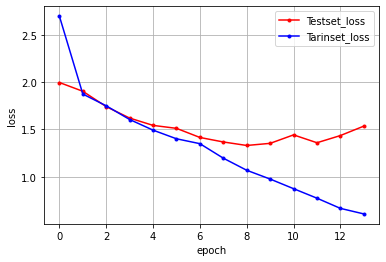

In [20]:
#그래프 그려보기
y_vloss=history.history['val_loss']
y_loss =history.history["loss"]
y_acc  =history.history["accuracy"]

x_len= np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.', c="r",label="Testset_loss")
plt.plot(x_len, y_loss,marker='.', c="b", label="Tarinset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()